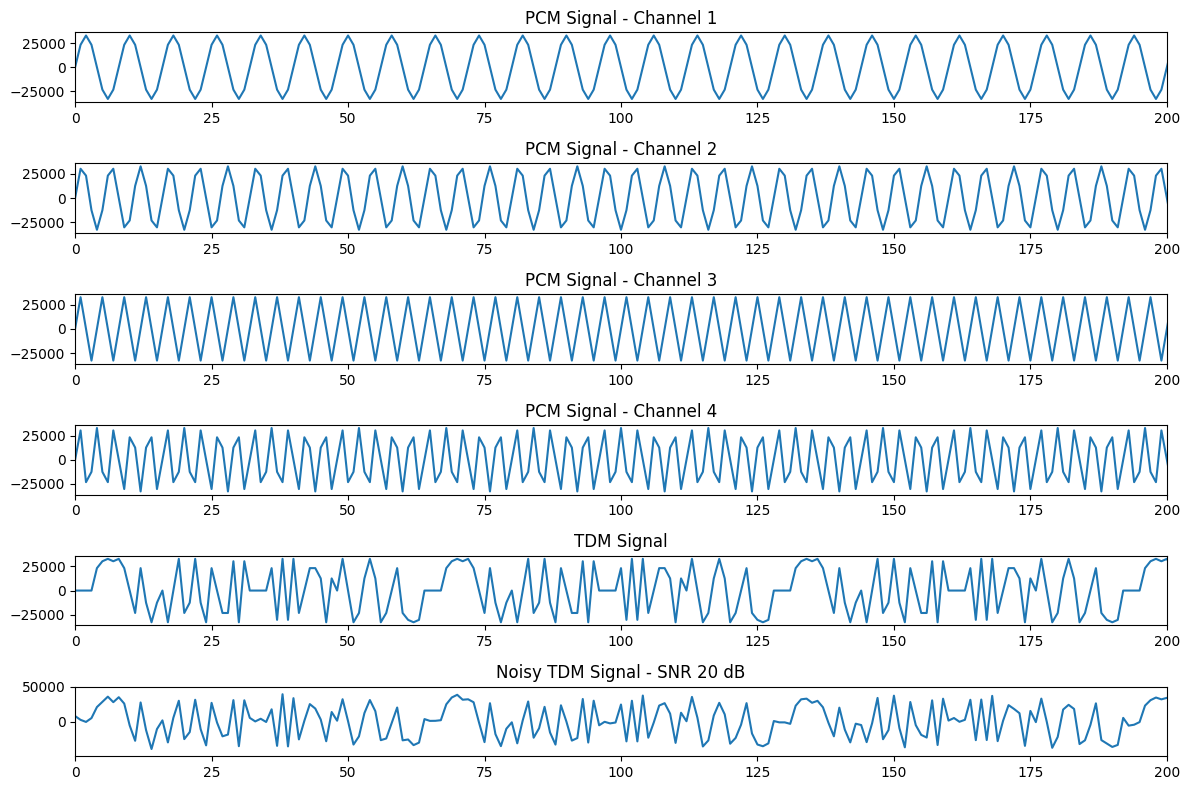

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def pcm_waveform(signal_freq, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    pcm_signal = np.int16(32767 * np.sin(2 * np.pi * signal_freq * t))

    return pcm_signal

def time_division_multiplexing(signals, num_channels):
    max_length = max(len(signal) for signal in signals)
    tdm_signal = np.zeros(num_channels * max_length, dtype=np.int16)
    
    for i, signal in enumerate(signals):
        tdm_signal[i::num_channels] = signal
    
    return tdm_signal

def add_noise(signal, snr_db):
    noise = np.random.normal(0, 10**(-snr_db/20.0) * np.max(signal), len(signal))
    noisy_signal = signal + noise

    return noisy_signal

# Parameters
signal_frequency = 1000  # Hz
sampling_rate = 8000     # Hz
duration = 1             # seconds
num_channels = 4
snr_db = 20

# Generate PCM waveforms for each channel
channels = [pcm_waveform(signal_frequency + i * 500, sampling_rate, duration) for i in range(num_channels)]

# Time Division Multiplexing
tdm_signal = time_division_multiplexing(channels, num_channels)

# Add noise to the TDM signal
noisy_tdm_signal = add_noise(tdm_signal, snr_db)

# Plot PCM signals, TDM signal, and Noisy TDM signal
plt.figure(figsize=(12, 8))

for i, channel in enumerate(channels):
    plt.subplot(num_channels + 2, 1, i + 1)
    plt.xlim(0,200)
    plt.plot(channel)
    plt.title(f'PCM Signal - Channel {i + 1}')

plt.subplot(num_channels + 2, 1, num_channels + 1)
plt.plot(tdm_signal)
plt.xlim(0,200)
plt.title('TDM Signal')

plt.subplot(num_channels + 2, 1, num_channels + 2)
plt.plot(noisy_tdm_signal)
plt.xlim(0,200)
plt.title(f'Noisy TDM Signal - SNR {snr_db} dB')

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Transmitter
def generate_sin_wave(freq, amplitude, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    return amplitude * np.sin(2 * np.pi * freq * t)

def generate_tri_wave(freq, amplitude, sampling_rate, duration):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    return amplitude * signal.sawtooth(2 * np.pi * freq * t, 0.5)

def anti_aliasing_filter(signal, cutoff_freq, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
    return signal.lfilter(b, a, signal)

def generate_bipolar_nrz_sequence(signal):
    return np.sign(signal)

def time_multiplexing(signals):
    return np.vstack(signals).ravel()

# Channel
def add_awgn(signal, variance):
    noise = np.random.normal(0, np.sqrt(variance), len(signal))
    return signal + noise

# Receiver
def demultiplex_signal(signal, num_channels):
    return [signal[i::num_channels] for i in range(num_channels)]

def generate_quantized_signal(signal, levels):
    quantized_values = np.linspace(-1, 1, levels)
    return np.digitize(signal, quantized_values) - 1

def reconstruct_signal(signal, sampling_rate, cutoff_freq):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
    return signal.lfilter(b, a, signal)

# Parameters
frequency = 10          # Hz
amplitude_sin = 1
amplitude_tri = 2
sampling_rate = 1000    # Hz
duration = 5            # seconds
num_channels = 2
awgn_variances = [0.001, 0.01, 0.1, 1, 10]
quantization_levels = 16
lpf_cutoff_freq = 50    # Hz

# Transmitter
sin_wave = generate_sin_wave(frequency, amplitude_sin, sampling_rate, duration)
tri_wave = generate_tri_wave(frequency, amplitude_tri, sampling_rate, duration)

filtered_sin_wave = anti_aliasing_filter(sin_wave, 2 * frequency, sampling_rate)
filtered_tri_wave = anti_aliasing_filter(tri_wave, 2 * frequency, sampling_rate)

bipolar_nrz_seq = generate_bipolar_nrz_sequence(time_multiplexing([filtered_sin_wave, filtered_tri_wave]))

# Channel
transmitted_signal = add_awgn(bipolar_nrz_seq, awgn_variances[0])

# Receiver
demultiplexed_signals = demultiplex_signal(transmitted_signal, num_channels)

quantized_signals = [generate_quantized_signal(signal, quantization_levels) for signal in demultiplexed_signals]

reconstructed_signals = [reconstruct_signal(signal, sampling_rate, lpf_cutoff_freq) for signal in quantized_signals]

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(sin_wave[:int(sampling_rate * duration)])
plt.title('Sinusoidal Signal')

plt.subplot(4, 1, 2)
plt.plot(tri_wave[:int(sampling_rate * duration)])
plt.title('Triangular Signal')

plt.subplot(4, 1, 3)
plt.plot(transmitted_signal[:int(sampling_rate * duration * num_channels)])
plt.title('Transmitted Signal with AWGN (Variance = 0.001)')

plt.subplot(4, 1, 4)
plt.plot(reconstructed_signals[0][:int(sampling_rate * duration)])
plt.title('Reconstructed Sinusoidal Signal')

plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'butter'

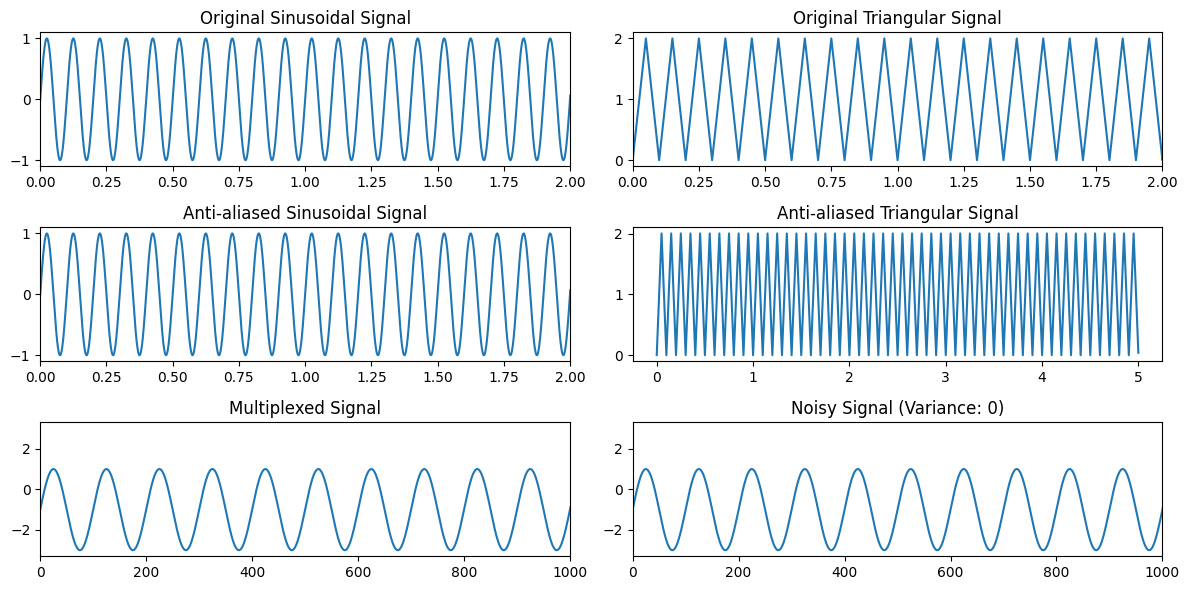

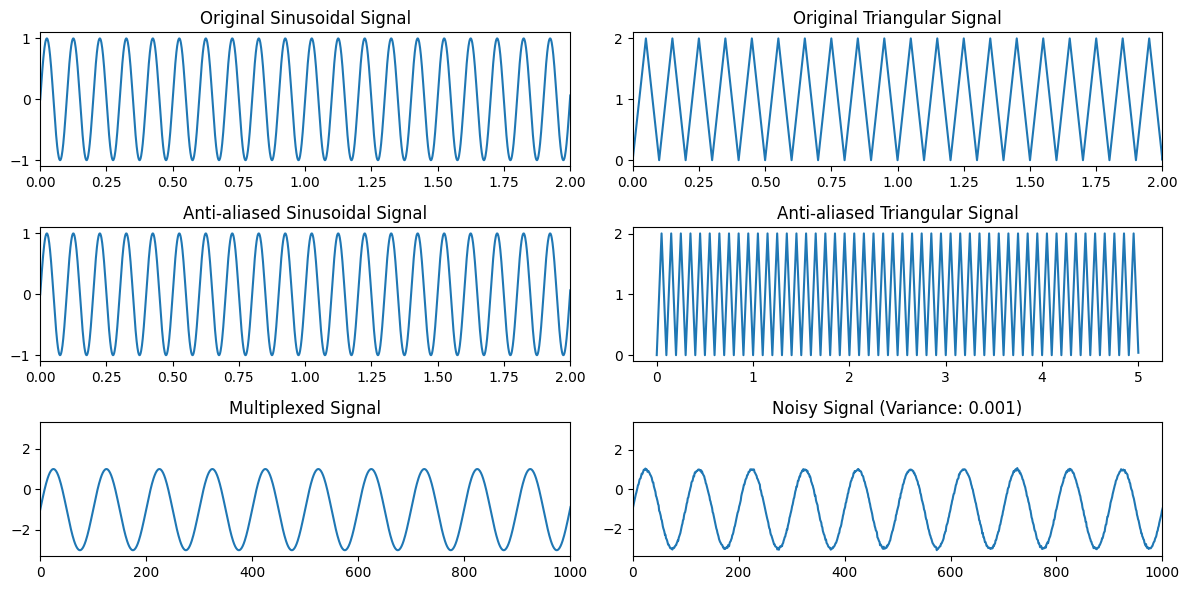

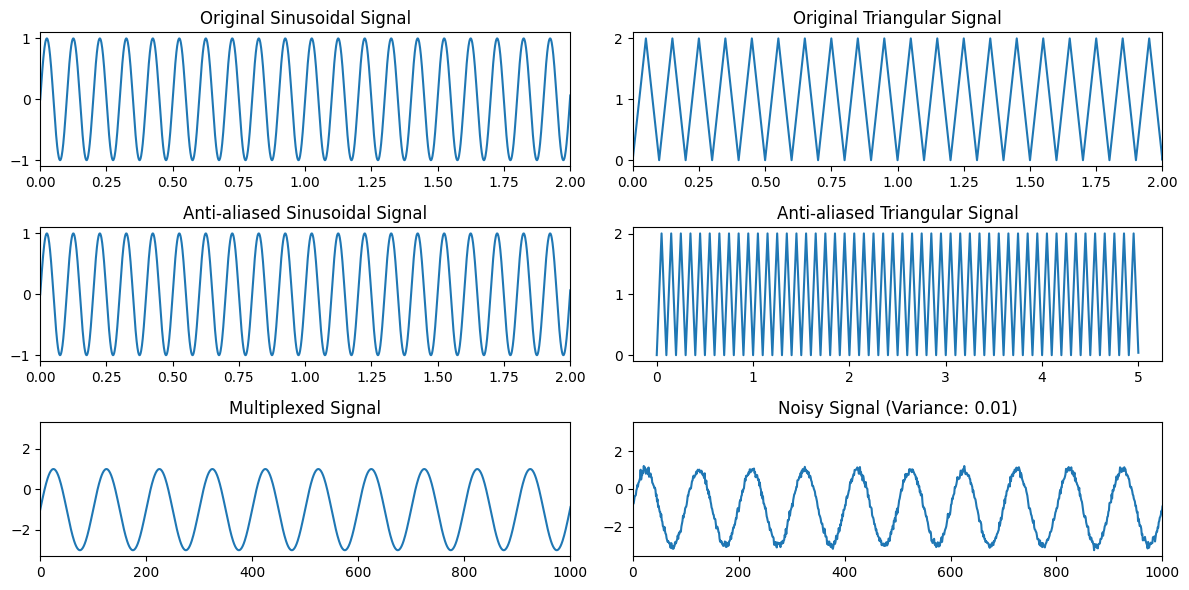

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sinusoidal signal
def generate_sinusoidal(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, signal

# Function to generate triangular signal
def generate_triangular(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5)))
    return t, signal

# Function for anti-aliasing filter
def anti_aliasing_filter(signal, sampling_rate, cutoff_frequency):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_frequency / nyquist
    _, h = np.array([1, 0]), np.array([1, -normalized_cutoff])
    h /= np.sum(h)
    filtered_signal = np.convolve(signal, h, mode='same')
    return filtered_signal

# Function to generate bipolar NRZ sequence
def generate_bipolar_NRZ(signal):
    return 2 * signal - 1

# Function to add AWGN noise
def add_AWGN(signal, variance):
    noise = np.random.normal(0, np.sqrt(variance), len(signal))
    return signal + noise

# Function for PCM demodulation
def pcm_demodulation(signal):
    return np.round((signal + 1) / 2)

# Function to reconstruct using LPF
def reconstruct_with_lpf(signal, cutoff_frequency, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_frequency / nyquist
    _, h = np.array([1, 0]), np.array([1, -normalized_cutoff])
    h /= np.sum(h)
    reconstructed_signal = np.convolve(signal, h, mode='same')
    return reconstructed_signal

# Simulation parameters
duration = 5  # seconds
sampling_rate = 1000  # Hz
frequency = 10  # Hz
amplitude_sinusoidal = 1
amplitude_triangular = 2
cutoff_frequency = 20  # Hz
variance_levels = [0, 0.001, 0.01]

# Transmitter
t_sinusoidal, signal_sinusoidal = generate_sinusoidal(amplitude_sinusoidal, frequency, duration, sampling_rate)
t_triangular, signal_triangular = generate_triangular(amplitude_triangular, frequency, duration, sampling_rate)

# Apply anti-aliasing filter
filtered_sinusoidal = anti_aliasing_filter(signal_sinusoidal, sampling_rate, cutoff_frequency)
filtered_triangular = anti_aliasing_filter(signal_triangular, sampling_rate, cutoff_frequency)

# Generate bipolar NRZ sequence
nrz_sinusoidal = generate_bipolar_NRZ(filtered_sinusoidal)
nrz_triangular = generate_bipolar_NRZ(filtered_triangular)

# Time multiplexing
multiplexed_signal = np.concatenate((nrz_sinusoidal, nrz_triangular))

# Channel
for variance in variance_levels:
    noisy_signal = add_AWGN(multiplexed_signal, variance)

    # Receiver
    demultiplexed_sinusoidal = noisy_signal[::2]
    demultiplexed_triangular = noisy_signal[1::2]

    # PCM demodulation
    demodulated_sinusoidal = pcm_demodulation(demultiplexed_sinusoidal)
    demodulated_triangular = pcm_demodulation(demultiplexed_triangular)

    # Reconstruct using LPF
    reconstructed_sinusoidal = reconstruct_with_lpf(demodulated_sinusoidal, cutoff_frequency, sampling_rate)
    reconstructed_triangular = reconstruct_with_lpf(demodulated_triangular, cutoff_frequency, sampling_rate)

    # Plot results
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 2, 1)
    plt.plot(t_sinusoidal, signal_sinusoidal)
    plt.xlim(0,2)
    plt.title('Original Sinusoidal Signal')

    plt.subplot(3, 2, 2)
    plt.plot(t_triangular, signal_triangular)
    plt.xlim(0,2)
    plt.title('Original Triangular Signal')

    plt.subplot(3, 2, 3)
    plt.plot(t_sinusoidal, filtered_sinusoidal)
    plt.xlim(0,2)
    plt.title('Anti-aliased Sinusoidal Signal')

    plt.subplot(3, 2, 4)
    plt.plot(t_triangular, filtered_triangular)
    plt.title('Anti-aliased Triangular Signal')

    plt.subplot(3, 2, 5)
    plt.plot(multiplexed_signal)
    plt.xlim(0,1000)
    plt.title('Multiplexed Signal')

    plt.subplot(3, 2, 6)
    plt.plot(noisy_signal)
    plt.xlim(0,1000)
    plt.title(f'Noisy Signal (Variance: {variance})')

    plt.tight_layout()
    plt.show()


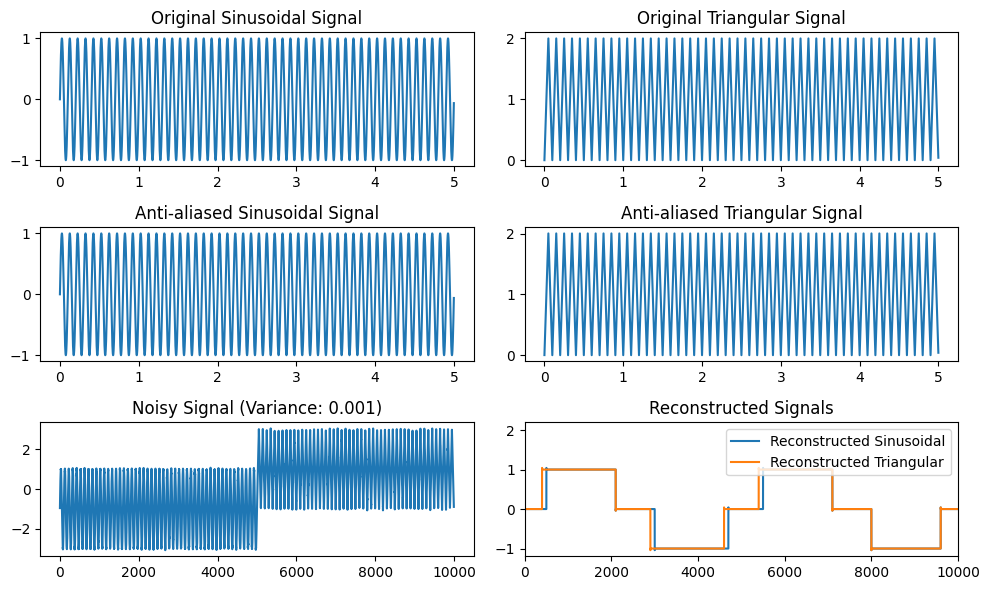

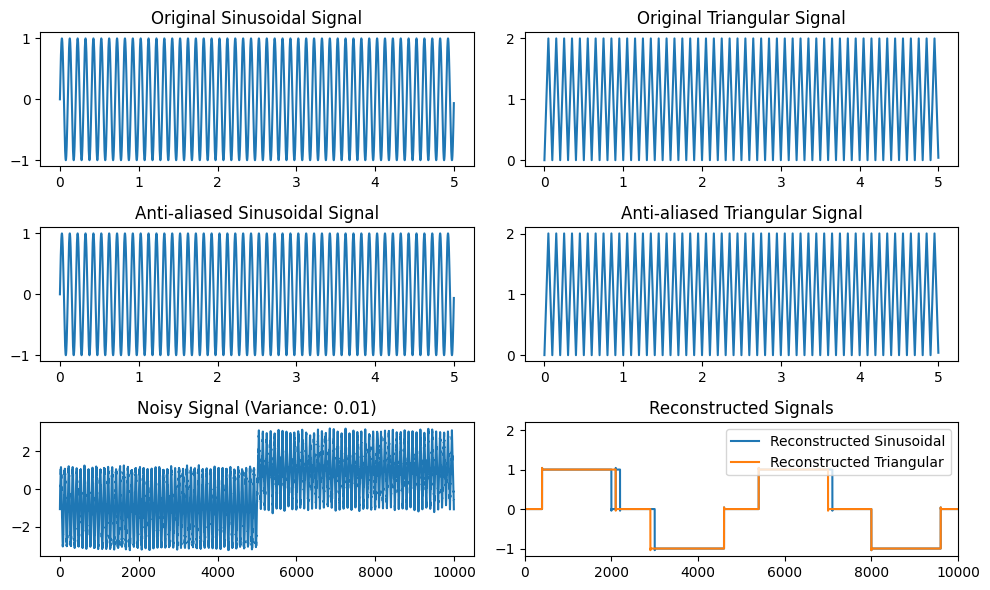

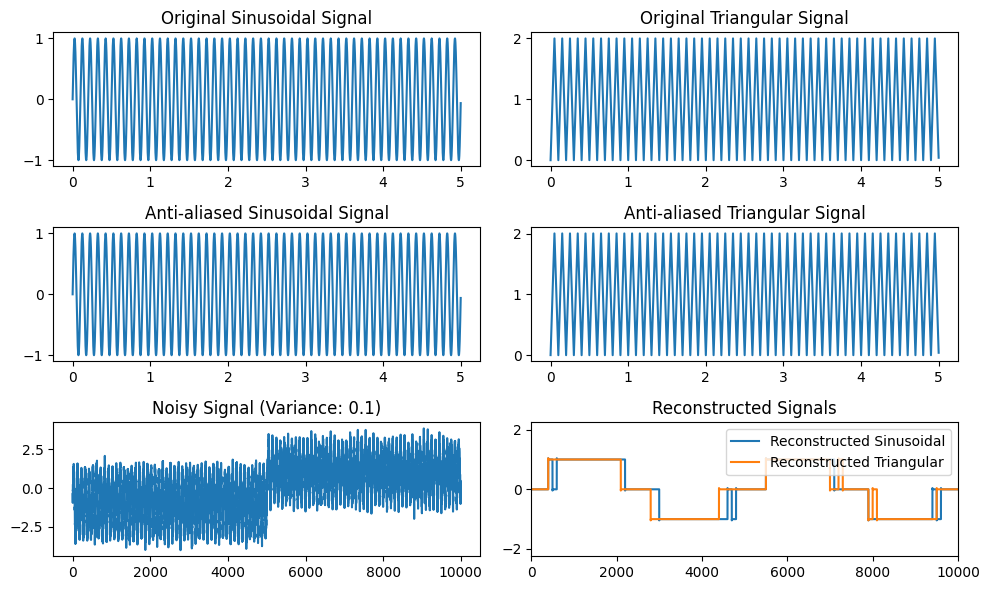

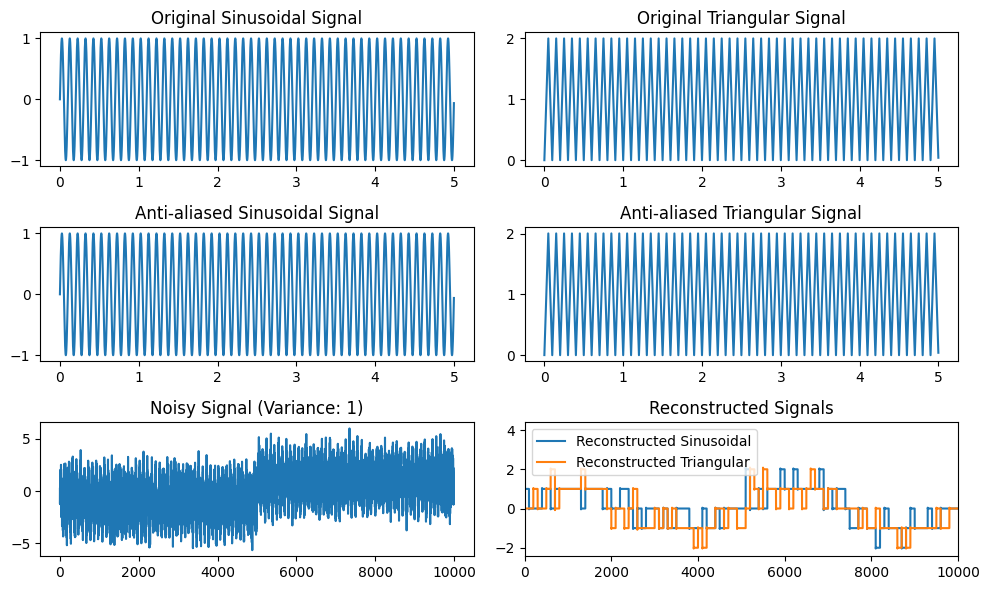

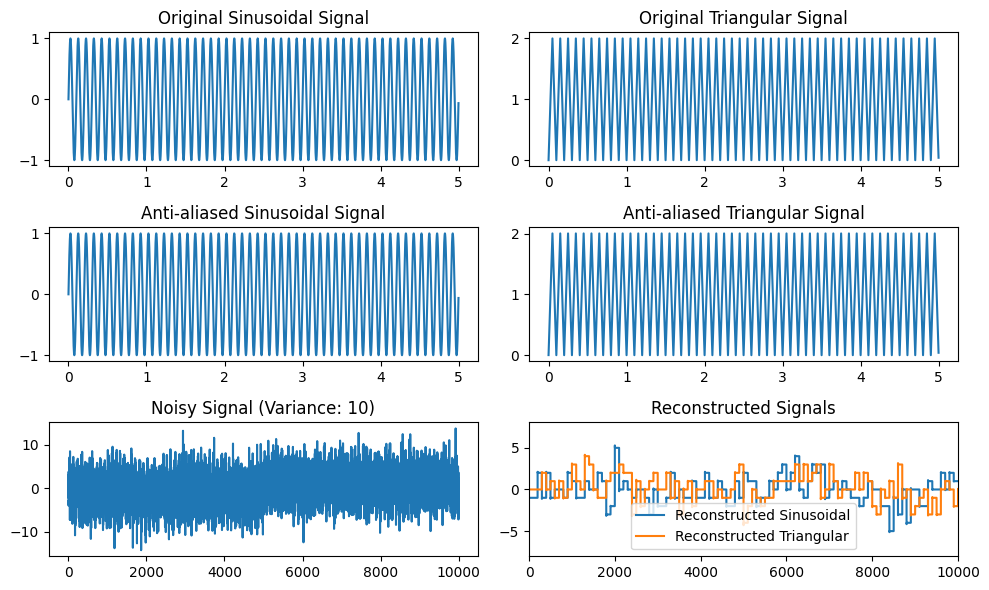

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sinusoidal signal
def generate_sinusoidal(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, signal

# Function to generate triangular signal
def generate_triangular(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5)))
    return t, signal

# Function for anti-aliasing filter
def anti_aliasing_filter(signal, sampling_rate, cutoff_frequency):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_frequency / nyquist
    _, h = np.array([1, 0]), np.array([1, -normalized_cutoff])
    h /= np.sum(h)
    filtered_signal = np.convolve(signal, h, mode='same')
    return filtered_signal

# Function to generate bipolar NRZ sequence
def generate_bipolar_NRZ(signal):
    return 2 * signal - 1

# Function for PCM demodulation
def pcm_demodulation(signal):
    return np.round((signal + 1) / 2)

# Function to reconstruct using LPF
def reconstruct_with_lpf(signal, cutoff_frequency, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normalized_cutoff = cutoff_frequency / nyquist
    _, h = np.array([1, 0]), np.array([1, -normalized_cutoff])
    h /= np.sum(h)
    reconstructed_signal = np.convolve(signal, h, mode='same')
    return reconstructed_signal

# Simulation parameters
duration = 5  # seconds
sampling_rate = 1000  # Hz
frequency = 10  # Hz
amplitude_sinusoidal = 1
amplitude_triangular = 2
cutoff_frequency = 20  # Hz
variance_levels = [0.001, 0.01, 0.1, 1, 10]

# Transmitter
t_sinusoidal, signal_sinusoidal = generate_sinusoidal(amplitude_sinusoidal, frequency, duration, sampling_rate)
t_triangular, signal_triangular = generate_triangular(amplitude_triangular, frequency, duration, sampling_rate)

# Apply anti-aliasing filter
filtered_sinusoidal = anti_aliasing_filter(signal_sinusoidal, sampling_rate, cutoff_frequency)
filtered_triangular = anti_aliasing_filter(signal_triangular, sampling_rate, cutoff_frequency)

# Generate bipolar NRZ sequence
nrz_sinusoidal = generate_bipolar_NRZ(filtered_sinusoidal)
nrz_triangular = generate_bipolar_NRZ(filtered_triangular)

# Time multiplexing
multiplexed_signal = np.concatenate((nrz_sinusoidal, nrz_triangular))

# Channel
for variance in variance_levels:
    # Add AWGN noise
    noisy_signal = multiplexed_signal + np.random.normal(0, np.sqrt(variance), len(multiplexed_signal))

    # Receiver
    demultiplexed_sinusoidal = noisy_signal[::2]
    demultiplexed_triangular = noisy_signal[1::2]

    # Regenerate each binary NRZ pulse
    regenerated_sinusoidal = np.repeat(demultiplexed_sinusoidal, int(sampling_rate / frequency))
    regenerated_triangular = np.repeat(demultiplexed_triangular, int(sampling_rate / frequency))

    # PCM demodulation
    demodulated_sinusoidal = pcm_demodulation(regenerated_sinusoidal)
    demodulated_triangular = pcm_demodulation(regenerated_triangular)

    # Reconstruct using LPF
    reconstructed_sinusoidal = reconstruct_with_lpf(demodulated_sinusoidal, cutoff_frequency, sampling_rate)
    reconstructed_triangular = reconstruct_with_lpf(demodulated_triangular, cutoff_frequency, sampling_rate)

    # Plot received signal
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 2, 1)
    plt.plot(t_sinusoidal, signal_sinusoidal)
    plt.title('Original Sinusoidal Signal')

    plt.subplot(3, 2, 2)
    plt.plot(t_triangular, signal_triangular)
    plt.title('Original Triangular Signal')

    plt.subplot(3, 2, 3)
    plt.plot(t_sinusoidal, filtered_sinusoidal)
    plt.title('Anti-aliased Sinusoidal Signal')

    plt.subplot(3, 2, 4)
    plt.plot(t_triangular, filtered_triangular)
    plt.title('Anti-aliased Triangular Signal')

    plt.subplot(3, 2, 5)
    plt.plot(noisy_signal)
    plt.title(f'Noisy Signal (Variance: {variance})')

    plt.subplot(3, 2, 6)
    plt.plot(reconstructed_sinusoidal, label='Reconstructed Sinusoidal')
    plt.plot(reconstructed_triangular, label='Reconstructed Triangular')
    plt.xlim(0,10000)
    plt.title('Reconstructed Signals')

    plt.tight_layout()
    plt.legend()
    plt.show()
